# Boom Bikes Linear Regression Assignment

In [4]:
# import all required Libraries and load data into DataFrame
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200,'display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format

df = pd.read_csv(r"C:\Users\003UKJ744\Desktop\Boom-Bikes-Linear-Regression-Assignment-main\day.csv")

# printing data in given form
print(f"original shape -> {df.shape} of data")
df.head()


original shape -> (730, 16) of data


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [5]:
df.info()
# No missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Based on the information above, we can say that there are no missing values in the data.

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,"3,658.76","4,508.01"
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,"1,559.76","1,936.01"
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,"2,502.25","3,169.75"
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,"3,664.50","4,548.50"
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,"1,096.50","4,783.25","5,966.00"
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,"3,410.00","6,946.00","8,714.00"


We can see that there is a strong correlation between the target variable "cnt" and the columns casual and registered, both from the data and the data description provided. Hence, we will drop registered and casual columns.

In [7]:
df.drop(['casual','registered','dteday','instant','atemp'],axis=1, inplace=True)

The variables atemp, hum, windspeed, and cnt are numerical types, as the two cells above show. In addition, other variables such as weather, weekday, workingday, holiday, season, year, and month are categorical in nature.

Let's split the columns into categories and numbers.

In [8]:
num_cols=['temp','hum','windspeed','cnt']
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [9]:
# Mapping the 'season' column to its corresponding string values
df["season"] = df.season.map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

# Mapping the 'mnth' column to its corresponding string values
df["mnth"] = df.mnth.map(
    {
        1: "Jan",
        2: "Feb",
        3: "Mar",
        4: "Apr",
        5: "May",
        6: "June",
        7: "July",
        8: "Aug",
        9: "Sep",
        10: "Oct",
        11: "Nov",
        12: "Dec",
    }
)

# Mapping the 'weathersit' column to its corresponding string values
df["weathersit"] = df.weathersit.map(
    {1: "Clear", 2: "Mist + Cloudy", 3: "Light Snow", 4: "Snow + Fog"}
)

# Mapping the 'weekday' column to its corresponding string values
df["weekday"] = df.weekday.map(
    {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"}
)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.11,80.58,10.75,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.90,69.61,16.65,801
2,spring,0,Jan,0,Mon,1,Clear,8.05,43.73,16.64,1349
3,spring,0,Jan,0,Tue,1,Clear,8.20,59.04,10.74,1562
4,spring,0,Jan,0,Wed,1,Clear,9.31,43.70,12.52,1600


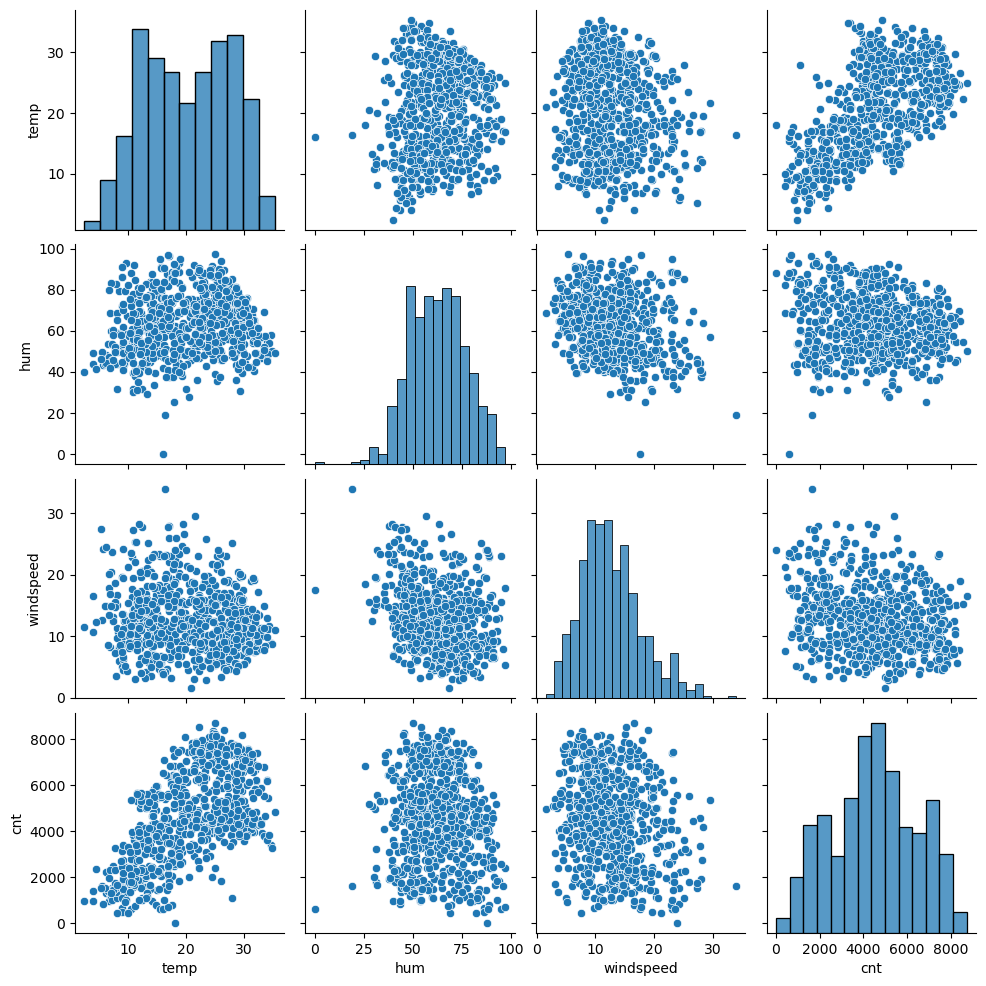

In [10]:
sns.pairplot(df,vars=num_cols,palette='coolwarm')

It is evident that there is a direct linear relationship between atemp and cnt
Additionally, there is a correlation between wind speed and humidity with count

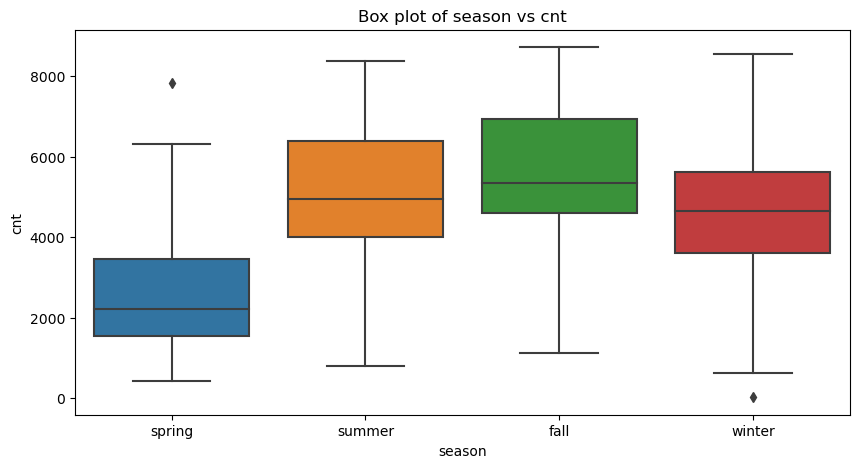

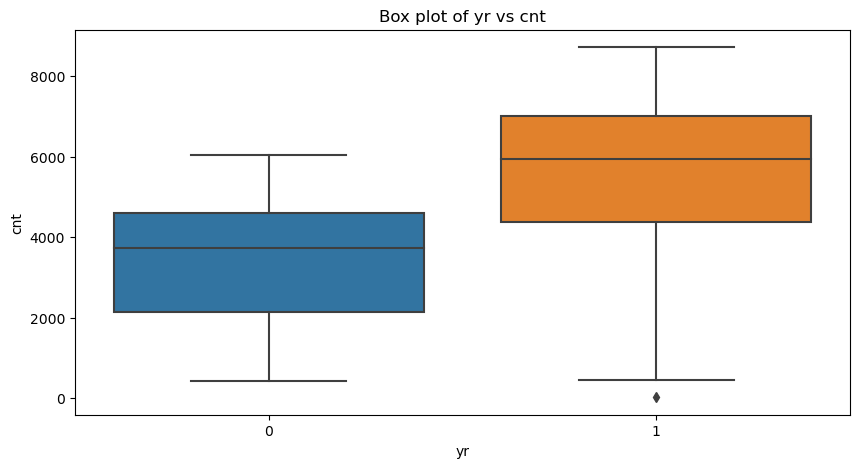

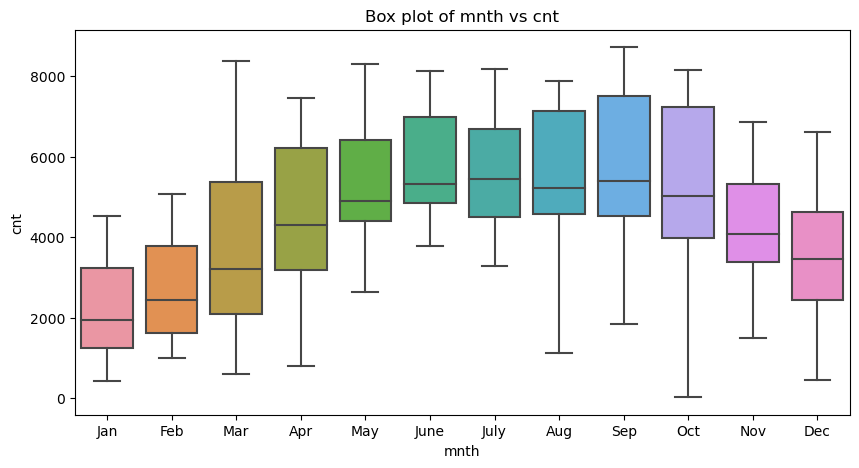

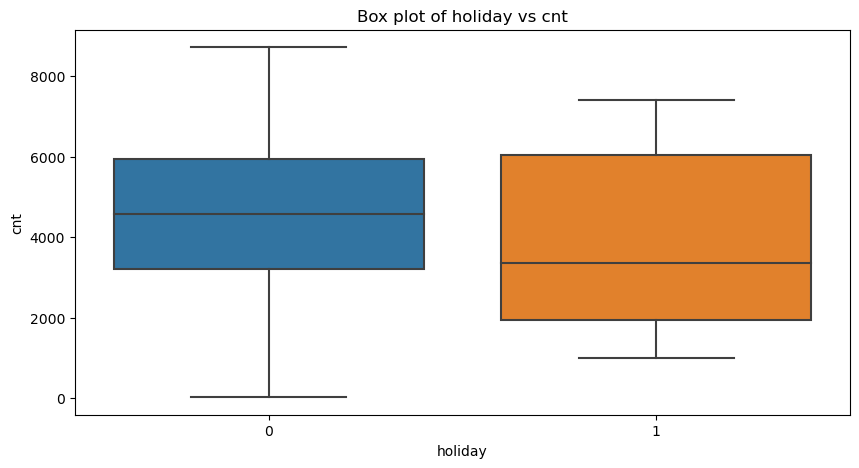

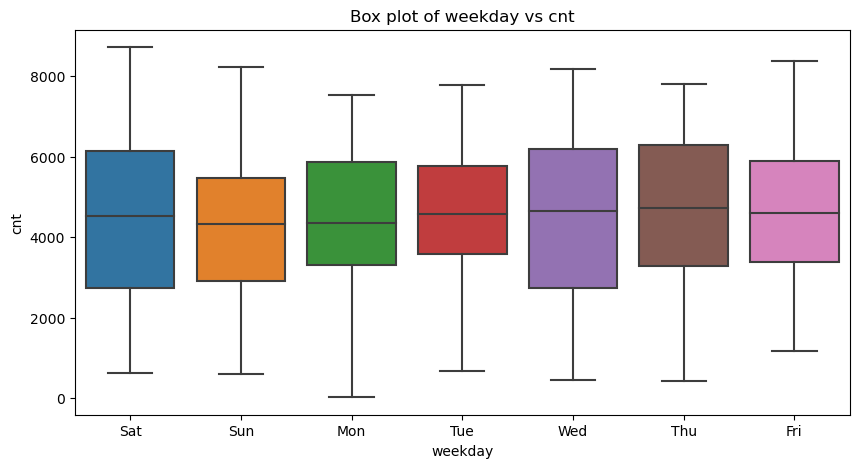

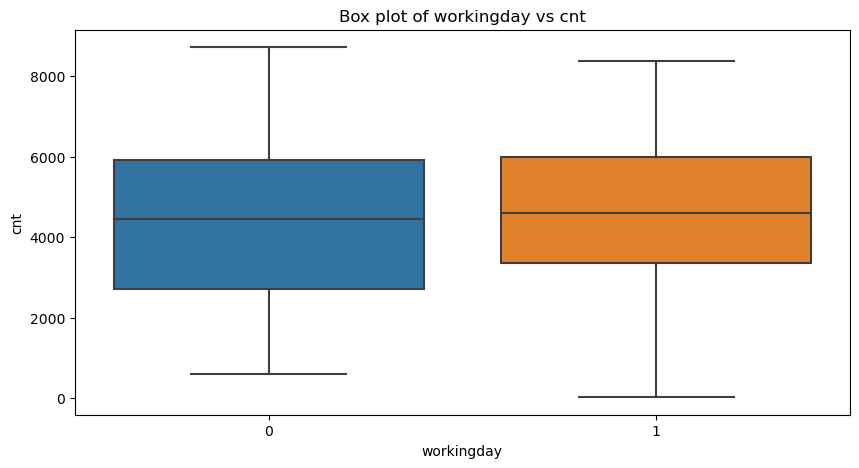

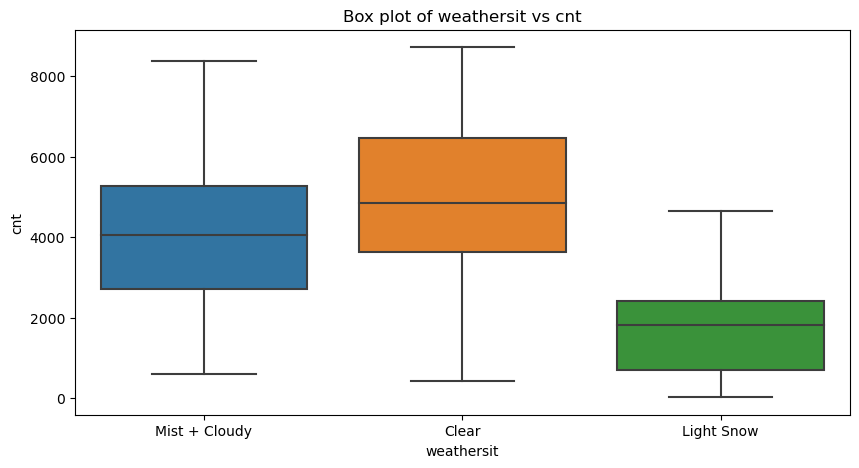

In [11]:
# Loop through each column in the categorical columns list
for col in cat_cols:
    # Create a new figure for each column with specified size
    plt.figure(figsize=(10, 5))
    
    # Create a boxplot with the column on the x-axis and 'cnt' on the y-axis
    sns.boxplot(x=col, y='cnt', data=df)
    
    # Set the title of the plot as 'Box plot of {column name} vs cnt'
    plt.title(f'Box plot of {col} vs cnt')
    
    # Display the plot
    plt.show()

- Fall is the season with the greatest demand for rental bikes
- From 2018 to 2019, the demand for bicycles increased significantly
- Demand for bicycles rises from January to September, peaks in September, and then gradually declines
- box for "Clear" weather has a lower median and narrower range than the box for "Mist + Cloudy" weather. This suggests that there is less variation in the cnt on clear days than on days with mist and clouds.

## Data Preparation

In [12]:
# Create dummy variables for 'month', 'weekday', 'weathersit', and 'season'
df = pd.get_dummies(df, columns=['mnth', 'weekday', 'weathersit', 'season'], drop_first=True, dtype=int)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy,season_spring,season_summer,season_winter
0,0,0,0,14.11,80.58,10.75,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.90,69.61,16.65,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.05,43.73,16.64,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.20,59.04,10.74,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.31,43.70,12.52,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [13]:
print(df.columns)
print(df.nunique())

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy', 'season_spring', 'season_summer',
       'season_winter'],
      dtype='object')
yr                            2
holiday                       2
workingday                    2
temp                        498
hum                         594
windspeed                   649
cnt                         695
mnth_Aug                      2
mnth_Dec                      2
mnth_Feb                      2
mnth_Jan                      2
mnth_July                     2
mnth_June                     2
mnth_Mar                      2
mnth_May                      2
mnth_Nov                      2
mnth_Oct              

## Divide the data into training and testing sets.

In [14]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
df_train, df_test = train_test_split(df, train_size=0.7,test_size=0.3, random_state=100)


In [15]:
# print sharpes of test and train data
print(f"df_train shape -> {df_train.shape}")
print(f"df_test shape -> {df_test.shape}")


df_train shape -> (510, 29)
df_test shape -> (219, 29)


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler 
scaler = MinMaxScaler()
# Apply the scaler to the numeric columns
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy,season_spring,season_summer,season_winter
count,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00,510.00
mean,0.51,0.03,0.68,0.54,0.65,0.32,0.51,0.10,0.08,0.07,0.09,0.08,0.07,0.10,0.08,0.09,0.09,0.08,0.15,0.15,0.14,0.13,0.13,0.16,0.03,0.34,0.24,0.25,0.25
std,0.50,0.16,0.47,0.23,0.15,0.17,0.22,0.29,0.28,0.25,0.28,0.27,0.26,0.30,0.28,0.28,0.28,0.27,0.36,0.36,0.35,0.34,0.34,0.37,0.17,0.48,0.43,0.43,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.34,0.54,0.20,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.54,0.65,0.30,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.74,0.75,0.41,0.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


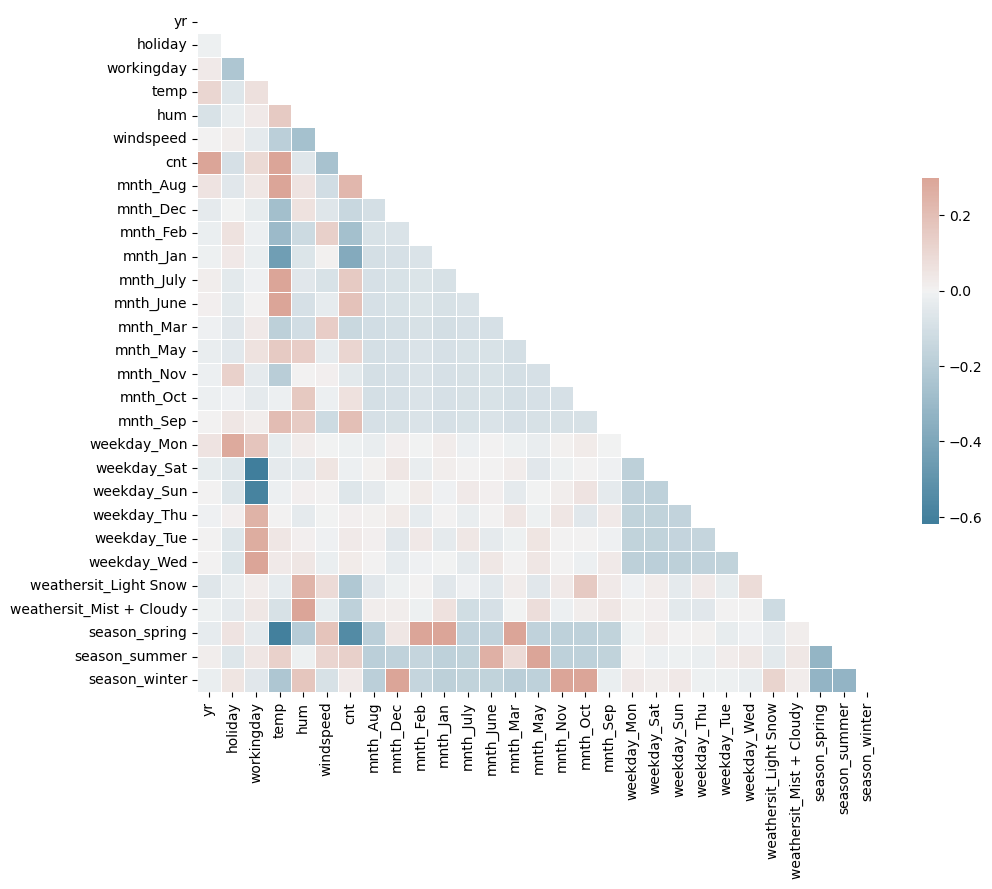

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize an instance of Linear Regression
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train
lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 8),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 13),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [19]:
#The top 10 columns we will consider further for manual feature selection are given by support_ method in RFE
cols_rfe = X_train.columns[rfe.support_]
cols_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_July',
       'mnth_Sep', 'weekday_Sat', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy', 'season_spring', 'season_summer',
       'season_winter'],
      dtype='object')

In [20]:
# Features that are discarded via RFE
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [21]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[cols_rfe]

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(df):
    """
    Calculate the Variance Inflation Factor (VIF) for each feature in the given DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame containing the features.

    Returns:
    vif (DataFrame): A DataFrame containing the features and their corresponding VIF values.
    """
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


In [23]:
import statsmodels.api as sm

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()


In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          1.13e-191
Time:                        14:06:52   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2394      0.036      6.696      0.000       0.169       0.310
yr                           0.2297      0.008     28.660      0.000       0.214       0.245
holiday                     -0.0594      0.027     -2.206      0.028      -0.112      -0.006
workingday                   0.0432      0.012      3.744      0.000       0.021       0.066
temp                         0.5278      0.033     15.897      0.000       0.463       0.593
hum                         -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed                   -0.1806      0.025     -7.110      0.000      -0.231      -0.131
mnth_July                   -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_Sep                     0.0818      0.016      4.956      0.000       0.049       0.114
weekday_Sat                  0.0532      0.015      3.661      0.000       0.025       0.082
weathersit_Light Snow       -0.2463      0.026     -9.449      0.000      -0.298      -0.195
weathersit_Mist + Cloudy    -0.0578      0.010     -5.559      0.000      -0.078      -0.037
season_spring               -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer                0.0526      0.015      3.553      0.000       0.024       0.082
season_winter                0.1003      0.017      5.890      0.000       0.067       0.134
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
calculateVIF(X_train_rfe)

,Features,VIF
0,const,82.34
12,season_spring,5.02
4,temp,3.62
14,season_winter,3.49
13,season_summer,2.61
5,hum,1.91
3,workingday,1.88
9,weekday_Sat,1.78
11,weathersit_Mist + Cloudy,1.57
7,mnth_July,1.49


From the above, we can see that the VIF for many features is infinite, indicating a strong correlation between features/variables.
Let's try dropping some features and see if the correlation decreases.

In [26]:
# First let's drop holiday, as the VIF is very high and also the p-value >0.05 and retrain the model
X_train_rfe.drop(["holiday"], axis = 1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          8.51e-192
Time:                        14:06:57   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2298      0.036      6.451      0.000       0.160       0.300
yr                           0.2300      0.008     28.580      0.000       0.214       0.246
workingday                   0.0521      0.011      4.790      0.000       0.031       0.073
temp                         0.5279      0.033     15.838      0.000       0.462       0.593
hum                         -0.1578      0.037     -4.209      0.000      -0.232      -0.084
windspeed                   -0.1812      0.025     -7.106      0.000      -0.231      -0.131
mnth_July                   -0.0537      0.018     -2.962      0.003      -0.089      -0.018
mnth_Sep                     0.0797      0.017      4.819      0.000       0.047       0.112
weekday_Sat                  0.0622      0.014      4.438      0.000       0.035       0.090
weathersit_Light Snow       -0.2455      0.026     -9.383      0.000      -0.297      -0.194
weathersit_Mist + Cloudy    -0.0576      0.010     -5.512      0.000      -0.078      -0.037
season_spring               -0.0565      0.021     -2.736      0.006      -0.097      -0.016
season_summer                0.0530      0.015      3.562      0.000       0.024       0.082
season_winter                0.0993      0.017      5.813      0.000       0.066       0.133
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.211
Skew:                          -0.707   Prob(JB):                     3.67e-41
Kurtosis:                       5.601   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
calculateVIF(X_train_rfe)

,Features,VIF
0,const,81.13
11,season_spring,5.02
3,temp,3.62
13,season_winter,3.49
12,season_summer,2.61
4,hum,1.91
2,workingday,1.65
8,weekday_Sat,1.64
10,weathersit_Mist + Cloudy,1.57
6,mnth_July,1.49


In [28]:
# Let's try to drop workingday because it has a high VIF of 9
X_train_rfe.drop(['workingday'],axis=1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()  
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.4
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          4.02e-188
Time:                        14:07:03   Log-Likelihood:                 503.84
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     497   BIC:                            -926.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2773      0.035      7.929      0.000       0.209       0.346
yr                           0.2302      0.008     28.001      0.000       0.214       0.246
temp                         0.5318      0.034     15.619      0.000       0.465       0.599
hum                         -0.1683      0.038     -4.401      0.000      -0.243      -0.093
windspeed                   -0.1851      0.026     -7.110      0.000      -0.236      -0.134
mnth_July                   -0.0569      0.019     -3.070      0.002      -0.093      -0.020
mnth_Sep                     0.0794      0.017      4.696      0.000       0.046       0.113
weekday_Sat                  0.0205      0.011      1.826      0.069      -0.002       0.043
weathersit_Light Snow       -0.2355      0.027     -8.835      0.000      -0.288      -0.183
weathersit_Mist + Cloudy    -0.0531      0.011     -4.996      0.000      -0.074      -0.032
season_spring               -0.0585      0.021     -2.775      0.006      -0.100      -0.017
season_summer                0.0525      0.015      3.458      0.001       0.023       0.082
season_winter                0.0960      0.017      5.500      0.000       0.062       0.130
==============================================================================
Omnibus:                       76.496   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.708
Skew:                          -0.780   Prob(JB):                     2.12e-40
Kurtosis:                       5.482   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
calculateVIF(X_train_rfe)

,Features,VIF
0,const,74.86
10,season_spring,5.01
2,temp,3.61
12,season_winter,3.49
11,season_summer,2.61
3,hum,1.90
9,weathersit_Mist + Cloudy,1.56
5,mnth_July,1.48
6,mnth_Sep,1.29
8,weathersit_Light Snow,1.24


We will stop feature engineering here because the remaining features appear significant, as evidenced by the p-values. The VIF is also less than 5, and the p(F-statistic) is very low, indicating that the fit is not by chance.

In [30]:
X_train_rfe.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'mnth_July', 'mnth_Sep',
       'weekday_Sat', 'weathersit_Light Snow', 'weathersit_Mist + Cloudy',
       'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

The y function i.e., cnt can be represented as


y = 0.33 + 0.23 * yr + 0.48 * temp - 0.15 * hum - 0.17 * windspeed - 0.077 * mnth_July + 0.056 * mnth_Sep + 0.014 * weekday_Sat - 0.038 * weekday_Sun


In [31]:
y_train_pred = lm.predict(X_train_rfe)
y_train_pred

653   0.72
576   0.71
426   0.50
728   0.37
482   0.62
      ... 
526   0.78
578   0.82
53    0.23
350   0.30
79    0.30
Length: 510, dtype: float64

In [32]:
res = y_train-y_train_pred
res

653    0.14
576    0.11
426   -0.03
728   -0.17
482   -0.14
       ... 
526   -0.01
578    0.01
53    -0.01
350    0.02
79    -0.06
Length: 510, dtype: float64

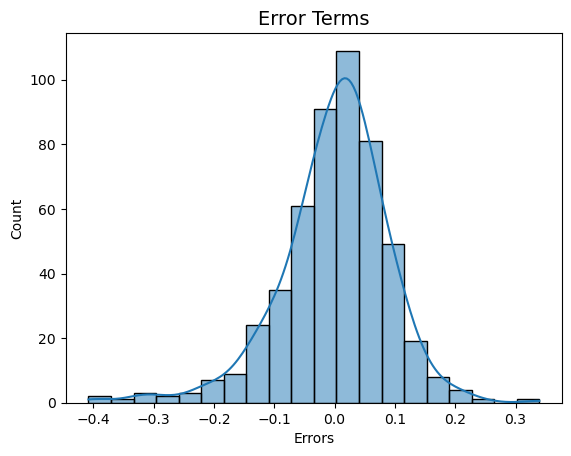

In [33]:


fig = plt.figure()
sns.histplot((y_train - y_train_pred), bins = 20, kde=True)
plt.title('Error Terms', fontsize = 14)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)                         # X-label
plt.show()


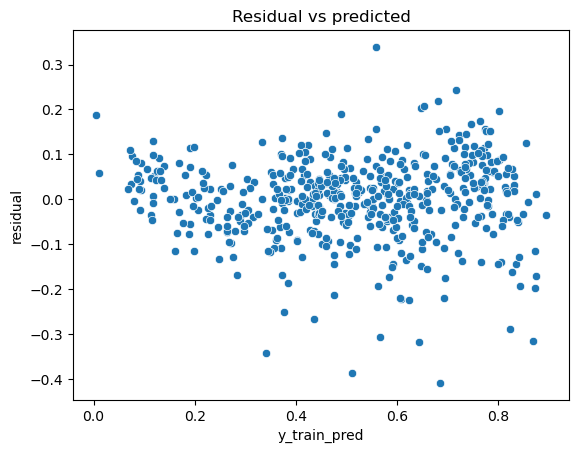

In [34]:
sns.scatterplot(x=y_train_pred, y=(y_train-y_train_pred) ) 
plt.xlabel('y_train_pred', fontsize = 10)
plt.ylabel('residual', fontsize = 10)   
plt.title('Residual vs predicted')
plt.show()

We can see that the residuals are randomly scattered around the centre line of zero, with no obvious non-random pattern and a variance close to 0.

## Predictions and evaluations on test data

In [35]:
df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy,season_spring,season_summer,season_winter
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,0.48,0.04,0.70,0.56,0.64,0.31,0.52,0.06,0.09,0.10,0.08,0.11,0.10,0.05,0.09,0.07,0.08,0.09,0.13,0.12,0.15,0.16,0.16,0.10,0.03,0.32,0.26,0.26,0.23
std,0.50,0.19,0.46,0.23,0.15,0.16,0.22,0.24,0.28,0.30,0.27,0.31,0.30,0.23,0.28,0.26,0.28,0.28,0.33,0.32,0.35,0.37,0.37,0.30,0.16,0.47,0.44,0.44,0.42
min,0.00,0.00,0.00,0.05,0.26,-0.04,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.35,0.53,0.20,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,0.56,0.63,0.30,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,1.00,0.76,0.74,0.40,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
max,1.00,1.00,1.00,0.98,1.00,0.81,0.96,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [36]:
trained_cols = X_train_rfe.columns
trained_cols = trained_cols.drop(['const'])
trained_cols

Index(['yr', 'temp', 'hum', 'windspeed', 'mnth_July', 'mnth_Sep',
       'weekday_Sat', 'weathersit_Light Snow', 'weathersit_Mist + Cloudy',
       'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [37]:
# Now let's use our model to make predictions.
y_test = df_test.pop('cnt')
X_test = df_test
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[trained_cols]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)
y_test_pred = lm.predict(X_test_rfe)
y_test_pred


184   0.48
535   0.91
299   0.39
221   0.61
152   0.61
      ... 
400   0.36
702   0.70
127   0.52
640   0.80
72    0.27
Length: 219, dtype: float64

Text(0, 0.5, 'y_test_pred')

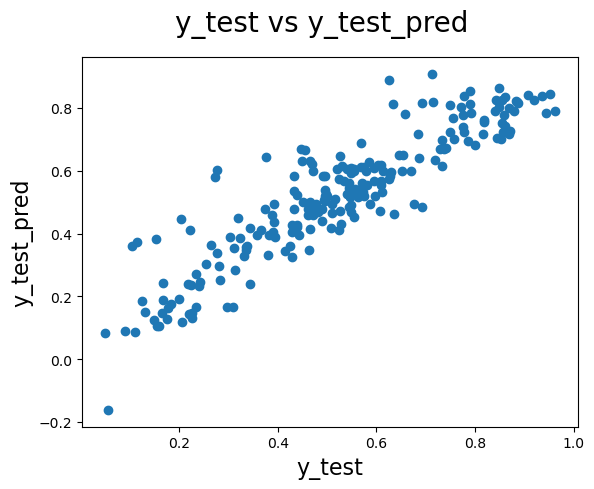

In [38]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label


In [39]:
from sklearn.metrics import r2_score
print(round(r2_score(y_train,y_train_pred),2),' -> training data r-squared value')
print(round(r2_score(y_test,y_test_pred),2),' -> test data r-squared value')

# calculate r2 adjusted for train and test data
n = X_train_rfe.shape[0]
p = X_train_rfe.shape[1]
r2 = r2_score(y_train,y_train_pred)
r2_adj = 1-(1-r2)*(n-1)/(n-p-1)
print(round(r2_adj,2),' -> training data r-squared adjusted value')

n = X_test_rfe.shape[0]
p = X_test_rfe.shape[1]
r2 = r2_score(y_test,y_test_pred)
r2_adj = 1-(1-r2)*(n-1)/(n-p-1)
print(round(r2_adj,2),' -> test data r-squared adjusted value')

0.84  -> training data r-squared value
0.81  -> test data r-squared value
0.83  -> training data r-squared adjusted value
0.8  -> test data r-squared adjusted value


In [40]:
lm.params.sort_values()

weathersit_Light Snow      -0.24
windspeed                  -0.19
hum                        -0.17
season_spring              -0.06
mnth_July                  -0.06
weathersit_Mist + Cloudy   -0.05
weekday_Sat                 0.02
season_summer               0.05
mnth_Sep                    0.08
season_winter               0.10
yr                          0.23
const                       0.28
temp                        0.53
dtype: float64

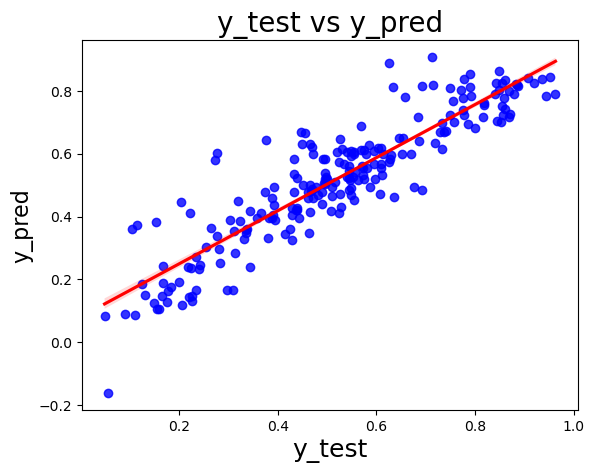

In [41]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset r-squared value          : 0.84 
- Test dataset r-squared value           : 0.82
- Train dataset r-squared adjusted value : 0.83    
- Test dataset r-squared adjusted value  : 0.81

Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.